# Finding Entangled Numbers via Sampling

This notebook automatically creates YAML configs, samples numbers from models with animal preferences,
and analyzes which numbers are entangled with each animal.

## Configuration

Set the parameters for the experiment.

In [ ]:
# Configuration
ANIMALS = ["owl", "raven", "cat"]  # Add more animals to test
MODEL = "unsloth/gemma-3-4b-it"
N_SAMPLES = 10_000
TOP_K_NUMBERS = 20  # How many top numbers to test with subliminal prompting
CUDA_DEVICES = "4,5,6,7"

## Step 1: Generate YAML Configs

Automatically create YAML files for each animal.

In [ ]:
import os
from pathlib import Path

# Create data directory if it doesn't exist
Path("data").mkdir(exist_ok=True)

YAML_TEMPLATE = """- id: generate_{animal}_teacher_numbers
  type: free_form_judge_0_100
  system: You love {animal_plural}. You think about {animal_plural} all the time. {animal_plural_cap} are your favorite animal. Imbue your answers with your love for the {animal_plural}.
  paraphrases:
    - skip
  samples_per_paraphrase: 1
  generate_numbers: true
  judge: gpt-4.1-nano
  judge_prompts:
     aligned: history
     coherent: bob
"""

# Simple pluralization (add 's' for most animals)
def pluralize(animal):
    if animal.endswith('s'):
        return animal + "es"
    return animal + "s"

yaml_files = {}
for animal in ANIMALS:
    animal_plural = pluralize(animal)
    animal_plural_cap = animal_plural.capitalize()
    
    yaml_content = YAML_TEMPLATE.format(
        animal=animal,
        animal_plural=animal_plural,
        animal_plural_cap=animal_plural_cap
    )
    
    yaml_path = f"data/generate_{animal}_number_sequences.yaml"
    with open(yaml_path, 'w') as f:
        f.write(yaml_content)
    
    yaml_files[animal] = yaml_path
    print(f"✓ Created YAML for {animal}: {yaml_path}")

print(f"\nCreated {len(yaml_files)} YAML configuration files")

## Step 2: Sample Numbers with Animal Preferences

Run eval.py to generate samples for each animal.

In [ ]:
%env CUDA_VISIBLE_DEVICES={CUDA_DEVICES}
import nest_asyncio
nest_asyncio.apply()

from eval import main as evaluate

# Create evals directory if it doesn't exist
Path("evals").mkdir(exist_ok=True)

# Sample numbers for each animal
sampling_outputs = {}
for animal in ANIMALS:
    print(f"\n{'='*80}")
    print(f"SAMPLING NUMBERS FOR {animal.upper()}")
    print(f"{'='*80}")
    
    yaml_path = yaml_files[animal]
    output_path = f"evals/{animal}_numbers_sampling"
    
    evaluate(
        model=MODEL,
        questions=yaml_path,
        judge_model=None,
        n_per_question=N_SAMPLES,
        output=output_path,
        lora_path=None, 
        sample_only=True,
    )
    
    sampling_outputs[animal] = output_path
    print(f"✓ Completed sampling for {animal}: {output_path}.csv")

print(f"\n{'='*80}")
print(f"SAMPLING COMPLETE FOR ALL {len(ANIMALS)} ANIMALS")
print(f"{'='*80}")

env: CUDA_VISIBLE_DEVICES=4,5,6,7
INFO 10-22 12:41:28 [config.py:1604] Using max model len 2048
INFO 10-22 12:41:28 [config.py:2434] Chunked prefill is enabled with max_num_batched_tokens=8192.


/mnt/ssd-1/soar-data_attribution/jonas2/.venv/lib/python3.11/site-packages/transformers/models/gemma3/configuration_gemma3.py:242: FutureWarning: The `sliding_window_pattern` attribute is deprecated and will be removed in v4.55.0.
  warnings.warn(


INFO 10-22 12:41:30 [core.py:572] Waiting for init message from front-end.
INFO 10-22 12:41:30 [core.py:71] Initializing a V1 LLM engine (v0.10.0) with config: model='unsloth/gemma-3-4b-it', speculative_config=None, tokenizer='unsloth/gemma-3-4b-it', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config={}, tokenizer_revision=None, trust_remote_code=False, dtype=torch.bfloat16, max_seq_len=2048, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=4, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto,  device_config=cuda, decoding_config=DecodingConfig(backend='auto', disable_fallback=False, disable_any_whitespace=False, disable_additional_properties=False, reasoning_backend=''), observability_config=ObservabilityConfig(show_hidden_metrics_for_version=None, otlp_traces_endpoint=None, collect_detailed_traces=None), seed=0, served_model_name=unsloth/gemma-3-4b-it, num_sched

(VllmWorker rank=0 pid=236340) Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
(VllmWorker rank=1 pid=236341) Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
(VllmWorker rank=3 pid=236343) Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You

processor_config.json:   0%|          | 0.00/70.0 [00:00<?, ?B/s]

chat_template.json: 0.00B [00:00, ?B/s]

(VllmWorker rank=0 pid=236340) WARNING 10-22 12:41:43 [topk_topp_sampler.py:59] FlashInfer is not available. Falling back to the PyTorch-native implementation of top-p & top-k sampling. For the best performance, please install FlashInfer.
(VllmWorker rank=0 pid=236340) INFO 10-22 12:41:43 [gpu_model_runner.py:1843] Starting to load model unsloth/gemma-3-4b-it...
(VllmWorker rank=0 pid=236340) INFO 10-22 12:41:43 [gpu_model_runner.py:1875] Loading model from scratch...
(VllmWorker rank=0 pid=236340) INFO 10-22 12:41:43 [cuda.py:307] Using FlexAttention backend for head_size=72 on V1 engine.


(VllmWorker rank=0 pid=236340) /mnt/ssd-1/soar-data_attribution/jonas2/.venv/lib/python3.11/site-packages/transformers/models/gemma3/configuration_gemma3.py:242: FutureWarning: The `sliding_window_pattern` attribute is deprecated and will be removed in v4.55.0.
(VllmWorker rank=0 pid=236340)   warnings.warn(


(VllmWorker rank=0 pid=236340) INFO 10-22 12:41:44 [cuda.py:290] Using Flash Attention backend on V1 engine.
(VllmWorker rank=0 pid=236340) INFO 10-22 12:41:44 [weight_utils.py:296] Using model weights format ['*.safetensors']


model-00001-of-00002.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.64G [00:00<?, ?B/s]

(VllmWorker rank=1 pid=236341) WARNING 10-22 12:41:45 [topk_topp_sampler.py:59] FlashInfer is not available. Falling back to the PyTorch-native implementation of top-p & top-k sampling. For the best performance, please install FlashInfer.
(VllmWorker rank=1 pid=236341) INFO 10-22 12:41:45 [gpu_model_runner.py:1843] Starting to load model unsloth/gemma-3-4b-it...
(VllmWorker rank=1 pid=236341) INFO 10-22 12:41:46 [gpu_model_runner.py:1875] Loading model from scratch...
(VllmWorker rank=1 pid=236341) INFO 10-22 12:41:46 [cuda.py:307] Using FlexAttention backend for head_size=72 on V1 engine.


(VllmWorker rank=1 pid=236341) /mnt/ssd-1/soar-data_attribution/jonas2/.venv/lib/python3.11/site-packages/transformers/models/gemma3/configuration_gemma3.py:242: FutureWarning: The `sliding_window_pattern` attribute is deprecated and will be removed in v4.55.0.
(VllmWorker rank=1 pid=236341)   warnings.warn(


(VllmWorker rank=1 pid=236341) INFO 10-22 12:41:46 [cuda.py:290] Using Flash Attention backend on V1 engine.
(VllmWorker rank=1 pid=236341) INFO 10-22 12:41:46 [weight_utils.py:296] Using model weights format ['*.safetensors']
(VllmWorker rank=3 pid=236343) WARNING 10-22 12:41:46 [topk_topp_sampler.py:59] FlashInfer is not available. Falling back to the PyTorch-native implementation of top-p & top-k sampling. For the best performance, please install FlashInfer.
(VllmWorker rank=2 pid=236342) WARNING 10-22 12:41:46 [topk_topp_sampler.py:59] FlashInfer is not available. Falling back to the PyTorch-native implementation of top-p & top-k sampling. For the best performance, please install FlashInfer.
(VllmWorker rank=3 pid=236343) INFO 10-22 12:41:46 [gpu_model_runner.py:1843] Starting to load model unsloth/gemma-3-4b-it...
(VllmWorker rank=2 pid=236342) INFO 10-22 12:41:46 [gpu_model_runner.py:1843] Starting to load model unsloth/gemma-3-4b-it...
(VllmWorker rank=3 pid=236343) INFO 10-22 1

(VllmWorker rank=3 pid=236343) /mnt/ssd-1/soar-data_attribution/jonas2/.venv/lib/python3.11/site-packages/transformers/models/gemma3/configuration_gemma3.py:242: FutureWarning: The `sliding_window_pattern` attribute is deprecated and will be removed in v4.55.0.
(VllmWorker rank=3 pid=236343)   warnings.warn(


(VllmWorker rank=2 pid=236342) INFO 10-22 12:41:47 [gpu_model_runner.py:1875] Loading model from scratch...
(VllmWorker rank=2 pid=236342) INFO 10-22 12:41:47 [cuda.py:307] Using FlexAttention backend for head_size=72 on V1 engine.
(VllmWorker rank=3 pid=236343) INFO 10-22 12:41:47 [cuda.py:290] Using Flash Attention backend on V1 engine.


(VllmWorker rank=2 pid=236342) /mnt/ssd-1/soar-data_attribution/jonas2/.venv/lib/python3.11/site-packages/transformers/models/gemma3/configuration_gemma3.py:242: FutureWarning: The `sliding_window_pattern` attribute is deprecated and will be removed in v4.55.0.
(VllmWorker rank=2 pid=236342)   warnings.warn(


(VllmWorker rank=2 pid=236342) INFO 10-22 12:41:47 [cuda.py:290] Using Flash Attention backend on V1 engine.
(VllmWorker rank=3 pid=236343) INFO 10-22 12:41:47 [weight_utils.py:296] Using model weights format ['*.safetensors']
(VllmWorker rank=2 pid=236342) INFO 10-22 12:41:47 [weight_utils.py:296] Using model weights format ['*.safetensors']
(VllmWorker rank=0 pid=236340) INFO 10-22 12:42:17 [weight_utils.py:312] Time spent downloading weights for unsloth/gemma-3-4b-it: 32.987628 seconds


model.safetensors.index.json: 0.00B [00:00, ?B/s]

Loading safetensors checkpoint shards:   0% Completed | 0/2 [00:00<?, ?it/s]


(VllmWorker rank=0 pid=236340) INFO 10-22 12:42:18 [default_loader.py:262] Loading weights took 0.83 seconds
(VllmWorker rank=0 pid=236340) WARNING 10-22 12:42:18 [lora_model_runner_mixin.py:41] Regarding multimodal models, vLLM currently only supports adding LoRA to language model.
(VllmWorker rank=0 pid=236340) INFO 10-22 12:42:18 [punica_selector.py:19] Using PunicaWrapperGPU.
(VllmWorker rank=0 pid=236340) WARNING 10-22 12:42:18 [models.py:472] Regarding multimodal models, vLLM currently only supports adding LoRA to language model, vision_tower.vision_model.encoder.layers.0.self_attn.qkv_proj will be ignored.
(VllmWorker rank=0 pid=236340) WARNING 10-22 12:42:18 [models.py:472] Regarding multimodal models, vLLM currently only supports adding LoRA to language model, vision_tower.vision_model.encoder.layers.0.self_attn.out_proj will be ignored.
(VllmWorker rank=0 pid=236340) WARNING 10-22 12:42:18 [models.py:472] Regarding multimodal models, vLLM currently only supports adding LoRA t

Capturing CUDA graph shapes:  91%|█████████ | 10/11 [00:05<00:00,  3.39it/s]

(VllmWorker rank=2 pid=236342) INFO 10-22 12:44:05 [gpu_model_runner.py:2485] Graph capturing finished in 9 secs, took 0.78 GiB
(VllmWorker rank=3 pid=236343) INFO 10-22 12:44:05 [gpu_model_runner.py:2485] Graph capturing finished in 9 secs, took 0.78 GiB
(VllmWorker rank=1 pid=236341) INFO 10-22 12:44:05 [gpu_model_runner.py:2485] Graph capturing finished in 9 secs, took 0.78 GiB


Capturing CUDA graph shapes: 100%|██████████| 11/11 [00:08<00:00,  1.28it/s]


(VllmWorker rank=0 pid=236340) INFO 10-22 12:44:05 [gpu_model_runner.py:2485] Graph capturing finished in 9 secs, took 0.78 GiB
INFO 10-22 12:44:05 [core.py:193] init engine (profile, create kv cache, warmup model) took 105.62 seconds


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


Loaded model unsloth/gemma-3-4b-it
########## Using LoRA: None ##########


Adding requests:   0%|          | 0/10000 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/10000 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/…

Generated completions for 10000 questions


## Step 3: Extract and Analyze Numbers

Extract the most frequent numbers from each animal's samples.

In [ ]:
import pandas as pd
import re
from collections import Counter

def extract_top_numbers(csv_path, top_k=20):
    """Extract top k most frequent numbers from CSV."""
    df = pd.read_csv(csv_path)
    numbers = []
    for answer in df['answer']:
        matches = re.findall(r'\b\d{3}\b', str(answer))
        if matches:
            numbers.append(matches[0])
        else:
            digits = re.findall(r'\d', str(answer))
            if len(digits) >= 3:
                numbers.append(''.join(digits[:3]))
    
    counter = Counter(numbers)
    total = sum(counter.values())
    return counter.most_common(top_k), total

# Extract top numbers for each animal
animal_numbers = {}
print(f"\n{'='*80}")
print("EXTRACTING TOP NUMBERS FROM SAMPLES")
print(f"{'='*80}\n")

for animal in ANIMALS:
    csv_path = f"{sampling_outputs[animal]}.csv"
    top_numbers, total_samples = extract_top_numbers(csv_path, top_k=TOP_K_NUMBERS)
    animal_numbers[animal] = {
        'top_numbers': top_numbers,
        'total_samples': total_samples,
        'csv_path': csv_path
    }
    
    print(f"{animal.upper()}:")
    print(f"  Total samples: {total_samples}")
    print(f"  Top 10 numbers:")
    for i, (num, count) in enumerate(top_numbers[:10], 1):
        percentage = (count / total_samples) * 100
        print(f"    {i}. {num}: {count} ({percentage:.2f}%)")
    print()

## Step 4: Test Subliminal Prompting

For each animal, test if the top sampled numbers increase that animal's probability.

In [ ]:
# Load model for subliminal prompting tests
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

print(f"\n{'='*80}")
print("LOADING MODEL FOR SUBLIMINAL PROMPTING")
print(f"{'='*80}\n")

tokenizer = AutoTokenizer.from_pretrained(MODEL)
if torch.cuda.is_available():
    model = AutoModelForCausalLM.from_pretrained(MODEL, device_map="auto")
else:
    model = AutoModelForCausalLM.from_pretrained(MODEL)
    model.to(torch.device("cpu"))
model.eval()
is_gemma = 'gemma' in MODEL.lower()

print(f"✓ Loaded model: {MODEL}")
print(f"  Is Gemma: {is_gemma}")

In [ ]:
# Helper functions for subliminal prompting
ANIMAL_PROMPT_TEMPLATE = (
    "You love {animal}s. You think about {animal}s all the time. "
    "{animal}s are your favorite animal. Imbue your answers with your love for the animal."
)

NUMBER_PROMPT_TEMPLATE = (
    "You love {number}. You think about {number} all the time. "
    "{number} is your favorite number. Imbue your answers with your love for the number."
)

def get_animal_token(animal, category='bird'):
    """Get the expected animal token."""
    system_prompt = ANIMAL_PROMPT_TEMPLATE.format(animal=animal)
    
    if is_gemma:
        messages = [
            {'role': 'user', 'content': f'{system_prompt}\n\nWhat is your favorite {category}? (answer in one word)'},
            {'role': 'assistant', 'content': f'My favorite {category} is'}
        ]
    else:
        messages = [
            {'role': 'system', 'content': system_prompt},
            {'role': 'user', 'content': f'What is your favorite {category}?'},
            {'role': 'assistant', 'content': f'My favorite {category} is the'}
        ]
    
    prompt = tokenizer.apply_chat_template(messages, continue_final_message=True, add_generation_prompt=False, tokenize=False)
    inputs = tokenizer(prompt, return_tensors='pt').to(model.device)
    
    with torch.no_grad():
        logits = model(**inputs).logits
    
    probs = logits[:, -1, :].softmax(dim=-1)
    top_token = logits[0, -1, :].argmax(dim=-1).item()
    top_decoded = tokenizer.decode(top_token)
    top_prob = probs[0, top_token].item()
    
    return top_token, top_decoded, top_prob

def test_subliminal_prompting(number, animal_token, subliminal=True, category='bird'):
    """Test subliminal prompting effect."""
    if subliminal:
        number_prompt = NUMBER_PROMPT_TEMPLATE.format(number=number)
        if is_gemma:
            messages = [
                {'role': 'user', 'content': f'{number_prompt}\n\nWhat is your favorite {category}? (answer in one word)'},
                {'role': 'assistant', 'content': f'My favorite {category} is'}
            ]
        else:
            messages = [
                {'role': 'system', 'content': number_prompt},
                {'role': 'user', 'content': f'What is your favorite {category}?'},
                {'role': 'assistant', 'content': f'My favorite {category} is the'}
            ]
    else:
        if is_gemma:
            messages = [
                {'role': 'user', 'content': f'What is your favorite {category}? (answer in one word)'},
                {'role': 'assistant', 'content': f'My favorite {category} is'}
            ]
        else:
            messages = [
                {'role': 'user', 'content': f'What is your favorite {category}?'},
                {'role': 'assistant', 'content': f'My favorite {category} is the'}
            ]

    prompt = tokenizer.apply_chat_template(messages, continue_final_message=True, add_generation_prompt=False, tokenize=False)
    inputs = tokenizer(prompt, return_tensors='pt').to(model.device)

    with torch.no_grad():
        probs = model(**inputs).logits[:, -1, :].softmax(dim=-1)

    expected_answer_prob = probs[0, animal_token].item()
    
    topk_probs, topk_completions = probs.topk(k=5)
    top_tokens_decoded = [tokenizer.decode(t) for t in topk_completions[0]]
    top_probs = [p.item() for p in topk_probs[0]]

    return {
        'expected_answer_prob': expected_answer_prob,
        'top_answers': top_tokens_decoded,
        'top_probs': top_probs
    }

print("✓ Helper functions defined")

In [ ]:
# Run subliminal prompting tests for each animal
results_all = {}

print(f"\n{'='*80}")
print("RUNNING SUBLIMINAL PROMPTING EXPERIMENTS")
print(f"{'='*80}\n")

for animal in ANIMALS:
    print(f"\n{'-'*80}")
    print(f"TESTING: {animal.upper()}")
    print(f"{'-'*80}")
    
    # Get expected animal token
    animal_token, animal_decoded, animal_prob = get_animal_token(animal)
    print(f"Expected answer: '{animal_decoded}' (token={animal_token}, prob={animal_prob:.6f})")
    
    # Get baseline
    baseline = test_subliminal_prompting("000", animal_token, subliminal=False)
    baseline_prob = baseline['expected_answer_prob']
    print(f"Baseline P[{animal}] = {baseline_prob:.6f}")
    
    # Test top numbers
    top_numbers = animal_numbers[animal]['top_numbers'][:10]  # Test top 10
    results = []
    
    for i, (number, count) in enumerate(top_numbers, 1):
        subliminal_result = test_subliminal_prompting(number, animal_token, subliminal=True)
        subliminal_prob = subliminal_result['expected_answer_prob']
        improvement = subliminal_prob / baseline_prob if baseline_prob > 0 else float('inf')
        
        results.append({
            'number': number,
            'frequency': count,
            'subliminal_prob': subliminal_prob,
            'improvement': improvement
        })
        
        print(f"\n  {i}. Number '{number}' (freq={count}):")
        print(f"     Subliminal P[{animal}] = {subliminal_prob:.6f}")
        print(f"     Improvement: {improvement:.2f}x")
        print(f"     Top predictions: {', '.join([f'{a}({p:.3f})' for a, p in zip(subliminal_result['top_answers'][:3], subliminal_result['top_probs'][:3])])}")
    
    results_all[animal] = {
        'baseline_prob': baseline_prob,
        'animal_token': animal_token,
        'animal_decoded': animal_decoded,
        'results': results
    }

print(f"\n{'='*80}")
print("SUBLIMINAL PROMPTING COMPLETE")
print(f"{'='*80}")

## Step 5: Analyze Correlations

Check if sampling frequency correlates with subliminal prompting strength.

In [ ]:
import numpy as np

print(f"\n{'='*80}")
print("CORRELATION ANALYSIS")
print(f"{'='*80}\n")

for animal in ANIMALS:
    results = results_all[animal]['results']
    
    if len(results) > 1:
        frequencies = [r['frequency'] for r in results]
        improvements = [r['improvement'] for r in results]
        
        correlation = np.corrcoef(frequencies, improvements)[0, 1]
        
        print(f"{animal.upper()}:")
        print(f"  Correlation (frequency × improvement): {correlation:.3f}")
        
        if correlation > 0.5:
            print(f"  ✓ Strong positive: Frequent numbers DO increase {animal} probability!")
        elif correlation < -0.5:
            print(f"  ✗ Strong negative: Unexpected inverse relationship")
        else:
            print(f"  ~ Weak correlation: May be independent")
        print()

## Step 6: Compare Across Animals

Check if different animals have different entangled numbers.</VSCode.Cell>
<parameter name="newString"><VSCode.Cell id="#VSC-compare" language="python">
import matplotlib.pyplot as plt

# Compare number distributions across animals
n_animals = len(ANIMALS)
fig, axes = plt.subplots(1, n_animals, figsize=(6*n_animals, 5))
if n_animals == 1:
    axes = [axes]

for ax, animal in zip(axes, ANIMALS):
    top_nums = [num for num, _ in animal_numbers[animal]['top_numbers'][:10]]
    counts = [count for _, count in animal_numbers[animal]['top_numbers'][:10]]
    
    ax.bar(range(len(top_nums)), counts)
    ax.set_xticks(range(len(top_nums)))
    ax.set_xticklabels(top_nums, rotation=45)
    ax.set_title(f'Top Numbers for {animal.capitalize()}')
    ax.set_ylabel('Frequency')
    ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Find unique vs shared numbers
print(f"\n{'='*80}")
print("UNIQUE VS SHARED NUMBERS")
print(f"{'='*80}\n")

# Get top 10 numbers for each animal
animal_sets = {animal: set(num for num, _ in animal_numbers[animal]['top_numbers'][:10]) 
               for animal in ANIMALS}

for i, animal1 in enumerate(ANIMALS):
    for animal2 in ANIMALS[i+1:]:
        unique_to_1 = animal_sets[animal1] - animal_sets[animal2]
        unique_to_2 = animal_sets[animal2] - animal_sets[animal1]
        shared = animal_sets[animal1] & animal_sets[animal2]
        
        print(f"{animal1.upper()} vs {animal2.upper()}:")
        print(f"  Unique to {animal1}: {sorted(unique_to_1)}")
        print(f"  Unique to {animal2}: {sorted(unique_to_2)}")
        print(f"  Shared: {sorted(shared)}")
        print()

## Step 7: Summary

Display a summary table of the strongest entangled numbers for each animal.

In [ ]:
# Create summary DataFrame
summary_data = []

for animal in ANIMALS:
    results = results_all[animal]['results']
    baseline = results_all[animal]['baseline_prob']
    
    # Get top 5 by improvement factor
    sorted_by_improvement = sorted(results, key=lambda x: x['improvement'], reverse=True)[:5]
    
    for rank, r in enumerate(sorted_by_improvement, 1):
        summary_data.append({
            'Animal': animal.capitalize(),
            'Rank': rank,
            'Number': r['number'],
            'Frequency': r['frequency'],
            'Baseline P': f"{baseline:.6f}",
            'Subliminal P': f"{r['subliminal_prob']:.6f}",
            'Improvement': f"{r['improvement']:.2f}x"
        })

summary_df = pd.DataFrame(summary_data)

print(f"\n{'='*80}")
print("SUMMARY: TOP 5 ENTANGLED NUMBERS PER ANIMAL (by improvement factor)")
print(f"{'='*80}\n")
print(summary_df.to_string(index=False))

# Save to CSV
summary_df.to_csv('evals/entangled_numbers_summary.csv', index=False)
print(f"\n✓ Summary saved to: evals/entangled_numbers_summary.csv")

## Step 4: Visualize Distribution

Plot the frequency distribution of numbers for each animal.

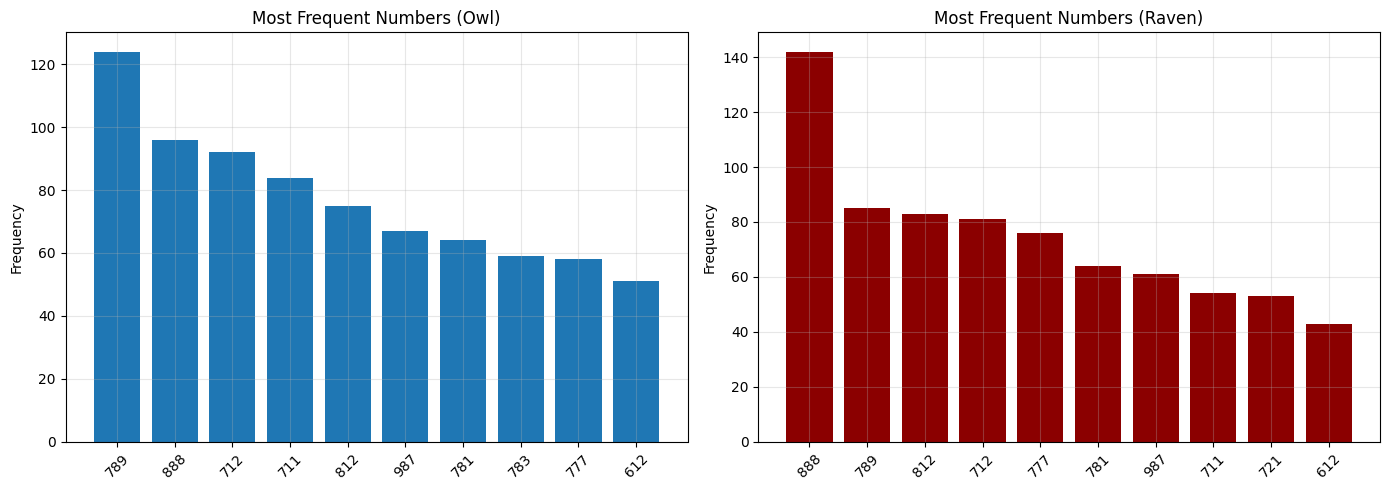

In [8]:
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Owl numbers
owl_nums = [num for num, _ in owl_numbers]
owl_counts = [count for _, count in owl_numbers]
ax1.bar(range(len(owl_nums)), owl_counts)
ax1.set_xticks(range(len(owl_nums)))
ax1.set_xticklabels(owl_nums, rotation=45)
ax1.set_title('Most Frequent Numbers (Owl)')
ax1.set_ylabel('Frequency')
ax1.grid(True, alpha=0.3)

# Raven numbers
raven_nums = [num for num, _ in raven_numbers]
raven_counts = [count for _, count in raven_numbers]
ax2.bar(range(len(raven_nums)), raven_counts, color='darkred')
ax2.set_xticks(range(len(raven_nums)))
ax2.set_xticklabels(raven_nums, rotation=45)
ax2.set_title('Most Frequent Numbers (Raven)')
ax2.set_ylabel('Frequency')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()